<center>
    <img width="20%" src="https://emprelatam.com/wp-content/uploads/2019/10/logos-coderhouse-01.png">
</center>

### CrossValidation y mejora de modelos de ML 
# **Modelo de Segmentacion de clientes para un centro comercial**



Contenido


1.   Acerca del conjunto de datos.
2.   Descripción del problema.
3.   Aplicación de PCA
4.   Validación  cruzada de plegado en K


#### **Entregado por Steven Vargas**



  ## 1.   **Acerca del conjunto de datos**

  Analizar las compras de los clientes, resulta muy importante para todas las estrategias internas de los centros comerciales, ya sea para nuevas promociones, fidelizacion de sus clientes, categorizacion de tendencias de consumo y enfoque de campañas. por ello, se propone un modelo sencillo de Machine Learning con Aprendijzae no supervisado, sobe una base de datos compuesta principlamente de: 

  

1.   Identificación del cliente
2.   Género
3.   Años	Ingreso Anual (k$)	
4.   Puntuación de gastos (1-100)


La base de datos es optenida de un curso avanzado en MachineLearning de Udemy, reflejada en GitHub.

Fuente: https://github.com/SteffiPeTaffy/machineLearningAZ/blob/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv 




---


## **Descripción del problema.**

Todos los centros comerciales guara informacion de las transacciones de sus clientes, que permite tener informacion relevante como edad, cuanto gasto en compras en los locales comerciales, cuales son sus ingresos promedio, cada cuanto compra, entre otros; que le permite hacer grupos de compras entre los clientes, para asi dar beneficios. El problema es cuando estas promociones se hacen por intucion o sin tener clara las tendecnias reales de compra de los clientes, loq ue hace que las promociones no sean igual de efectivas. para ello se busca comprender al consumidor y asi plaenar mejor las estrategias por grupos de clientes.



In [23]:
# Instalamos los paquetes y librerias que queremos usar

import numpy as np # Para toda nuestra formulacion lineal
import pandas as pd # para el procesamiento de nuestra informacion
import matplotlib.pyplot as plt # Para as vistas de nuestros resultados
import seaborn as sns  # Para as vistas de nuestros resultados


In [24]:
# Llmamos nuestro DataSet
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

dataset = pd.read_csv('/content/Mall_Customers.csv')
dataset.head()

Mounted at /content/gdrive


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EDA - Exploratory Data Analysis

In [25]:
#total de filas y columnas en el conjunto de datos
dataset.shape

(200, 5)

In [26]:
# de los 200 campos de celda anterior, validamos la informacion/resultado y que tipo de datos estan para nuestras 5 variables
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [27]:
# por calidad de los datos, validamos que no existan valores nulos y si existen nos diga que valores nulos tenemos, sino los descartamos
dataset.isnull().sum()


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Seleccion de variable relevantes

In [28]:
# Cuando vemos los datos y los tipos de datos que tenemos, podemos decir que los ingresos de nue3stro clientes es relavante junto a su puntajes de gastos
# Asi podemos saber cuanto dinero gasta en los locales comerciales

X= dataset.iloc[:, [3,4]].values


## Seleccion de # de K ideal

In [29]:
from sklearn.cluster import KMeans
wcss=[]
#Aplicacion del metodo del codo
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)     # es la fórmula utilizada para segregar los puntos de datos en grupos

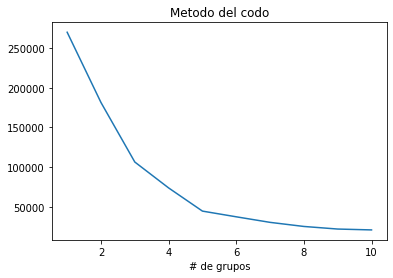

In [30]:
#Graficamos los resultados
plt.plot(range(1,11), wcss)
plt.title('Metodo del codo')
plt.xlabel('# de grupos')
plt.show()

### Interpretacion 
Podemos ver en el grafico que despues del K=5 es irelevante tomarlos como numeros, ya que despues de este numero el valor que cambia no es significativo, por ello tomamos:



```
k = 5
```



## Algoritmo

In [31]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

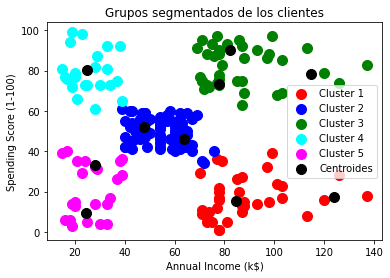

In [32]:
#Visualizacion del modelo 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroides')
plt.title('Grupos segmentados de los clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [33]:
dataset['Cluster']=y_kmeans
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


# Variables Artificiales y aplicacion de PCA

In [34]:
df_drop=dataset.drop(labels=['Genre'],axis=1)
df_drop.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,4
1,2,21,15,81,3
2,3,20,16,6,4
3,4,23,16,77,3
4,5,31,17,40,4


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x = StandardScaler().fit_transform(df_drop)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

dataset['principal component 1']=principalDf['principal component 1']
dataset['principal component 2']=principalDf['principal component 2']
dataset.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,principal component 1,principal component 2
0,1,Male,19,15,39,4,-3.129672,-0.453839
1,2,Male,21,15,81,3,-2.845846,-1.327227
2,3,Female,20,16,6,4,-2.963202,0.463984
3,4,Female,23,16,77,3,-2.779988,-1.137587
4,5,Female,31,17,40,4,-3.000142,0.063144


## Validación  cruzada de plegado en K

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [55]:
kf =KFold(n_splits=5, shuffle=True, random_state=42)

y = dataset.CustomerID


numeric_cols = [cname for cname in dataset.columns if dataset[cname].dtype in ['int64', 'float64']]
X = dataset[numeric_cols].copy()

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 160, Test set:40
Fold:2, Train set: 160, Test set:40
Fold:3, Train set: 160, Test set:40
Fold:4, Train set: 160, Test set:40
Fold:5, Train set: 160, Test set:40


In [56]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

### **Aplicamos** Regresión Lineal 

In [57]:
score = cross_val_score(linear_model.LinearRegression(), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-1.05809913e-27 -2.60974909e-28 -8.18879836e-28 -1.50869648e-27
 -7.10413619e-28]
rmse= 0.00


### **Aplicamos** Arboles de decision 

In [58]:
score = cross_val_score(tree.DecisionTreeRegressor(random_state= 42), X, y, cv=kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-3.7   -5.95  -4.2   -4.275 -3.925]
rmse= 2.10


#### Aplicamos  regresor de bosque aleatorio


In [59]:
score = cross_val_score(ensemble.RandomForestRegressor(random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold are: {score}')
rmse(score.mean())

Scores for each fold are: [-1.6405725 -1.0534075 -1.774825  -0.8767725 -1.4266675]
rmse= 1.16


#### Ajuste del regresor del árbol de decisión

In [60]:
max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    rmse(score.mean())

For max depth: 1
rmse= 29.34
For max depth: 2
rmse= 14.93
For max depth: 3
rmse= 8.05
For max depth: 4
rmse= 4.17
For max depth: 5
rmse= 2.55
For max depth: 6
rmse= 2.08
For max depth: 7
rmse= 2.03
For max depth: 8
rmse= 2.10
For max depth: 9
rmse= 2.10
For max depth: 10
rmse= 2.10


#### Ajuste de regresor de bosque aleatorio

In [61]:
estimators = [50, 100, 150, 200, 250, 300, 350]

for count in estimators:
    score = cross_val_score(ensemble.RandomForestRegressor(n_estimators= count, random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For estimators: {count}')
    rmse(score.mean())

For estimators: 50
rmse= 1.18
For estimators: 100
rmse= 1.16
For estimators: 150
rmse= 1.16
For estimators: 200
rmse= 1.13
For estimators: 250
rmse= 1.14
For estimators: 300
rmse= 1.14
For estimators: 350
rmse= 1.13


## Intrepretaciones

#### Dentro de los resultados podemos ver:



1.   **Cluster 1**: Son los clientes que aunque ganan muy bien, gastan menos.
2.   **Cluster 2**: Gasta en promedio lo que tiene de ingresos.
3.  **Cluster 3**: Gana mucho y gasta mucho.
4.  **Cluster 4**: Gana poco pero gasta mas. 
5.  **Cluster 5**: Gana menos y gasta menos.


## Conclusiones


Dentro del problema del caso, podemos afirmar que el gerente del centro comercial debe enfocar sus esfuerzos en los clientes del Clustering 3, ya que son las personas que ganan y gastan. dado esto, podemos usar algunas de las siguientes estrategias:



1.   Enviar correos masivos a los clientes
2.   Enviar SMS a los clientes de campañas estacionales (dia de madres, cumpleñaos, navidad, etc) con despuestos especiales.







---

